In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Number Of Fundings

Given File 'startup_funding.csv'

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
year1 TotalFunding1
year2 TotalFunding2


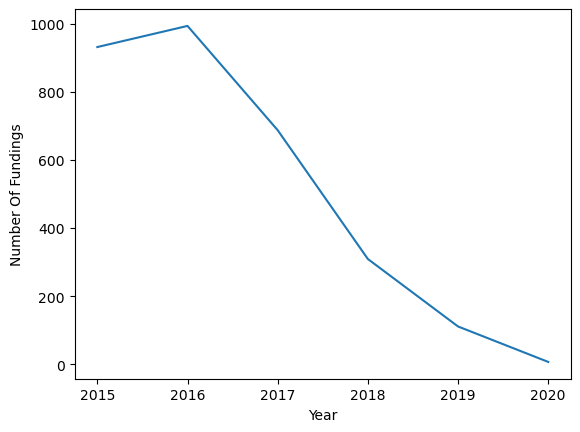

2015 931
2016 993
2017 687
2018 309
2019 111
2020 7


In [86]:
startup = pd.read_csv("startup_funding.csv")
data = startup.copy()


data['date'] = data['Date dd/mm/yyyy']

# There are 4 columns coming for some reason when we split the date
data[['day', 'month', 'year', 'empty']] = data['date'].str.split('/', expand=True)

# Removing that extra column from our dataset
data.drop('empty' , axis=1)


# Storing the number of startups corresponding to a year
year_startups = data['year'].value_counts().sort_index()

year = year_startups.index
startups = year_startups.values

year = np.array(year)
startups = np.array(startups)

startups[2] += startups[1]          # adding the value of 015 to year 2015

# removing the first 2 values as they were incorrect data
startups = startups[2:]             
year = year[2:]

plt.plot(year,startups)
plt.xlabel('Year')
plt.ylabel('Number Of Fundings')
plt.show()

for i in range(len(year)):
    print(year[i] , startups[i])


# Top Indian Cities

Problem statement
Given File 'startup_funding.csv'

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :
city1 number1
city2 number2
. . . 



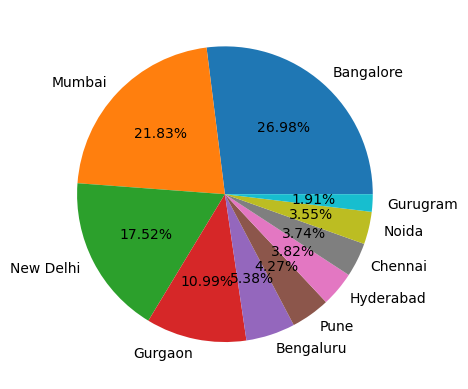

Bangalore 707
Mumbai 572
New Delhi 459
Gurgaon 288
Bengaluru 141
Pune 112
Hyderabad 100
Chennai 98
Noida 93
Gurugram 50


In [85]:
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df['CityLocation'] = df['City  Location']

df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city): 
    return city.split('/')[0].strip() 
df['CityLocation']=df['CityLocation'].apply(separateCity) 
df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'

city_startups = df['CityLocation'].value_counts().sort_values(ascending=False)

city_startups = city_startups[:10]

city = city_startups.index
startups = city_startups.values

plt.pie(startups , labels=city , autopct='%0.2f%%')
plt.show()

for i in range(len(city)):
    print(city[i] , startups[i])



# Funding Amount

Problem statement
Given File 'startup_funding.csv'

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
year1 TotalFunding1
year2 TotalFunding2
. . . 



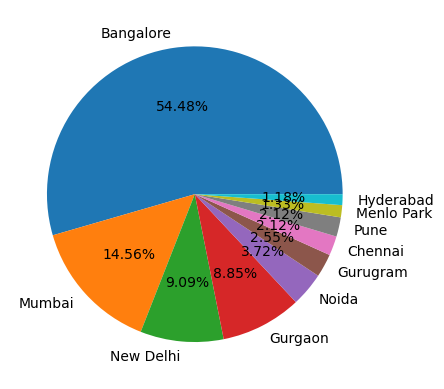

Bangalore 54.48
Mumbai 14.56
New Delhi 9.09
Gurgaon 8.85
Noida 3.72
Gurugram 2.55
Chennai 2.12
Pune 2.12
Menlo Park 1.33
Hyderabad 1.18


In [318]:
import collections
from collections import OrderedDict
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

dct = {}


df['amount'] = df['Amount in USD']      # making new column for simplicity
df['city'] = df['City  Location']

df.dropna(subset=["city"],inplace=True)


def separateCity(city): 
    return city.split('/')[0].strip() 
df['city']=df['city'].apply(separateCity) 
df[df['city']=='bangalore'] = 'Bangalore'
df[df['city']=='Delhi'] = 'New Delhi'


# Here we have cleaned the data.
# Basically first we replace every value of amount that has comma with nothing so 20,00 can become 20000.
# Then we checked if this value is a digit or not. If it is we have returned that digit else returned 0.
# This is done for cases where amount is 'undisclosed' or 'unknown' etc..
def clean_amount(x):
    if isinstance(x, str):
        x = x.replace(",", "")
        if x.isdigit():
            return int(x)
    return 0

df['amount'] = df['amount'].apply(clean_amount)



for index , row in df.iterrows():
    city = row['city']
    amount = row['amount']

    if city in dct:
        dct[city] += amount
    else:
        dct[city] = amount



# ord_dict
dct['Bangalore'] += dct['Bengaluru']
dct['Bengaluru'] = 0

ord_dict = OrderedDict(sorted(dct.items(), key=lambda item: item[1], reverse=True))

city = ord_dict.keys()
amount = ord_dict.values()

city = list(city)
amount = list(amount)

city = np.array(city)
amount = np.array(amount)

city = city[:10]
amount = amount[:10]

plt.pie(amount , labels=city , autopct='%0.2f%%')
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))


# Investment Type

Problem statement
Given File 'startup_funding.csv'

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 



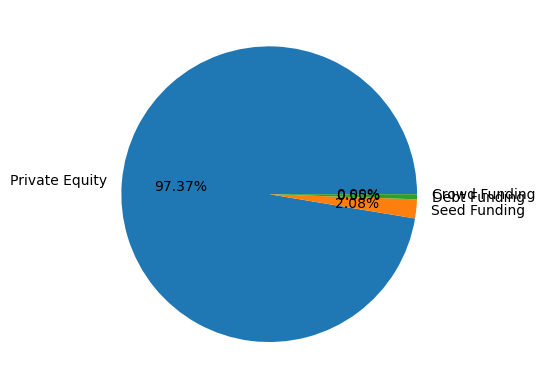

Private Equity 97.37
Seed Funding 2.08
Debt Funding 0.55
Crowd Funding 0.00


In [216]:
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.rename(columns = {'InvestmentnType':'InvestmentType' , 'Amount in USD':'amount'}, inplace = True) 
df['InvestmentType'].value_counts()
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

def clean_amount(x):
    if isinstance(x, str):
        x = x.replace(",", "")
        if x.isdigit():
            return int(x)
    return 0

df['amount'] = df['amount'].apply(clean_amount)

dct = {'Private Equity':0 , 'Seed Funding':0 , 'Debt Funding':0 , 'Crowd Funding':0}
for index , row in df.iterrows():
    investment_type = row['InvestmentType']
    amount = row['amount']

    if investment_type in dct:
        dct[investment_type] += amount
    

investment_type = np.array(list(dct.keys()))
amount = np.array(list(dct.values()))

plt.pie(amount , labels=investment_type , autopct='%0.2f%%')
plt.show()


percent = np.true_divide(amount,amount.sum())*100
for i in range(len(amount)):
    print(investment_type[i],format(percent[i],'0.2f'))


# Top Industries

Problem statement
Given File 'startup_funding.csv'

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :
industry1 percent1
industry2 percent2
industry3 percent3



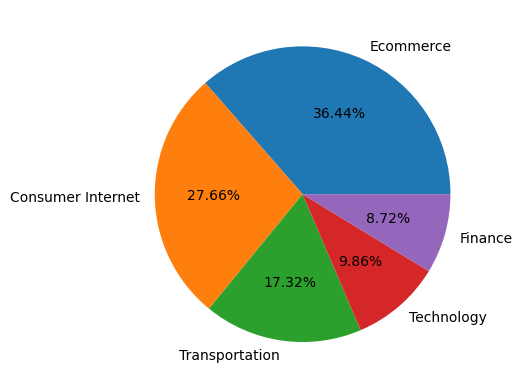

Ecommerce 36.44
Consumer Internet 27.66
Transportation 17.32
Technology 9.86
Finance 8.72


In [231]:
import collections
from collections import OrderedDict

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.rename(columns = {'Industry Vertical':'Industry' , 'Amount in USD':'amount'}, inplace = True) 
df.dropna(subset=['Industry'] , inplace = True)

def clean_amount(x):
    if isinstance(x, str):
        x = x.replace(",", "")
        if x.isdigit():
            return int(x)
    return 0

df['Industry'].replace(['E-commerce' ,'E-Commerce' , 'eCommerce','ECommerce'],'Ecommerce',inplace = True)

df['amount'] = df['amount'].apply(clean_amount)



dct = {}
for index , row in df.iterrows():
    industry = row['Industry']
    amount = row['amount']

    if industry in dct:
        dct[industry] += amount
    else:
        dct[industry] = amount

dct = OrderedDict(sorted(dct.items(), key=lambda item: item[1], reverse=True))

industry = np.array(list(dct.keys())[:5])
amount = np.array(list(dct.values())[:5])

plt.pie(amount , labels=industry , autopct='%0.2f%%')
plt.show()


percent = np.true_divide(amount,amount.sum())*100
for i in range(len(amount)):
    print(industry[i],format(percent[i],'0.2f'))

# Top Startups
Problem statement
Given File 'startup_funding.csv'

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1
startup2
startup3
. . . 



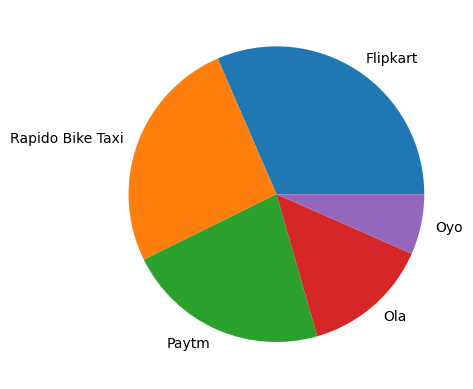

Flipkart
Rapido Bike Taxi
Paytm
Ola
Oyo


In [262]:
import collections
from collections import OrderedDict
import re

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.rename(columns = {'Startup Name':'startup_name' , 'Amount in USD':'amount'}, inplace = True) 

# df['startup_name'].value_counts().sort_values(ascending=False)[:6]


# cleaning the amount column
def clean_amount(x):
    if isinstance(x, str):
        x = x.replace(",", "")
        if x.isdigit():
            return int(x)
    return 0

df['amount'] = df['amount'].apply(clean_amount)

# cleaning the startup name column
df['startup_name'] = df['startup_name'].str.replace(r'.*Flipkart.*', 'Flipkart', regex=True,flags=re.IGNORECASE)
df['startup_name'] = df['startup_name'].str.replace(r'.*Ola.*', 'Ola', regex=True,flags=re.IGNORECASE)
df['startup_name'] = df['startup_name'].str.replace(r'.*Oyo.*', 'Oyo', regex=True,flags=re.IGNORECASE)
df['startup_name'] = df['startup_name'].str.replace(r'.*Paytm.*', 'Paytm', regex=True,flags=re.IGNORECASE)




startup_funding = df.groupby('startup_name')['amount'].sum().nlargest(5)

amount = list(startup_funding.values) 
name = list(startup_funding.index)

plt.pie(amount , labels=name)
plt.show()

for i in range(len(amount)):
    print(name[i])

# Funding Rounds

Problem statement
Given File 'startup_funding.csv'

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1 number1
startup2 number2
startup3 number3
. . . 



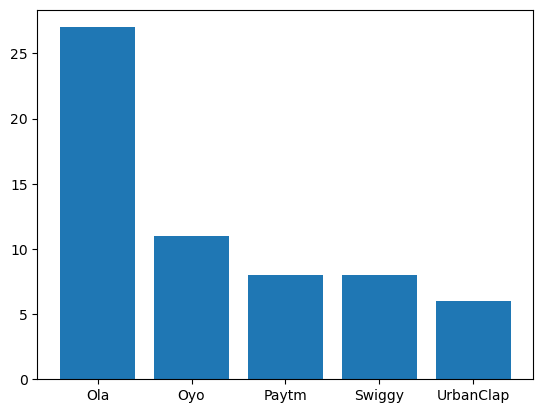

Ola 27
Oyo 11
Paytm 8
Swiggy 8
UrbanClap 6


In [277]:
import collections
from collections import OrderedDict
import re

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.rename(columns = {'Startup Name':'startup_name' , 'Amount in USD':'amount'}, inplace = True) 


# cleaning the startup name column
df['startup_name'] = df['startup_name'].str.replace(r'.*Flipkart.*', 'Flipkart', regex=True,flags=re.IGNORECASE)
df['startup_name'] = df['startup_name'].str.replace(r'.*Ola.*', 'Ola', regex=True,flags=re.IGNORECASE)
df['startup_name'] = df['startup_name'].str.replace(r'.*Oyo.*', 'Oyo', regex=True,flags=re.IGNORECASE)
df['startup_name'] = df['startup_name'].str.replace(r'.*Paytm.*', 'Paytm', regex=True,flags=re.IGNORECASE)



funding_round = df['startup_name'].value_counts().sort_values(ascending=False)[:5]

name = list(funding_round.index)
rounds = list(funding_round.values)

plt.bar(name,rounds)
plt.show()

for i in range(len(rounds)):
    print(name[i] , rounds[i])

# Top Investor


Problem statement
Given File 'startup_funding.csv'

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format :
investorname number



In [317]:
import collections
from collections import OrderedDict
import re

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.rename(columns = {'Startup Name':'startup_name' , 'Amount in USD':'amount' , 'Investors Name':'investor_name'}, inplace = True) 

df.dropna(subset=['investor_name'])

df = df[df['investor_name'] != 'Undisclosed Investors']
df = df[df['investor_name'] != 'Undisclosed investors']

dct={}

for index , row in df.iterrows():
    name = str(row['investor_name'])
    name = name.split(', ')
    
    for i in range(len(name)):
        if name[i] in dct:
            dct[name[i]] += 1
        else:
            dct[name[i]] = 1

dct = OrderedDict(sorted(dct.items(), key=lambda item: item[1], reverse=True))

name = list(dct.keys())[0]
number = list(dct.values())[0]

print(name,number)
# invester_number = df['investor_name'].value_counts().sort_values(ascending=False)
# invester_number


# name = list(invester_number.index)
# number = list(invester_number.values)

# print(*name,*number)



Sequoia Capital 70
